In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 8, 6
import numpy as np 
import pickle
import glob 
import os 
from scipy import integrate
from cycler import cycler
from mpl_toolkits.mplot3d import Axes3D

from functions import read_dat2file

data_dir='/users/bhastings/internship/data/MW/'
metallicity='mw'
file_ext= '.dat2'

In [3]:
# sort file names so that they are listed by mass, then rotation velocity 
m_val=lambda x : int(x.split('/')[-1].split('.')[0].split('-')[0][1:])
v_val= lambda x : int(x.split('/')[-1].split('.')[0].split('-')[1])

s1=sorted(glob.glob(data_dir +'*'+ file_ext), key=v_val)
data_files=sorted(s1, key= m_val)

print data_files[0:15]


[]


# find mass bins # 

In [4]:
mass_list=[3,5,7, 9, 12, 15, 20, 25, 30,40, 50, 60, 80, 100 ] # list of model masses


###################################3
#make bins from mass list############
####################################

#duplicate list with a shift 
ml2=[0]+ mass_list# mass_list.insert(0,0)
#print mass_list, ml2

bins=[]

for u,v in zip(mass_list, ml2):
    
    bins += [0.5*(u-v) + v]
    
print 'masses of models ', mass_list    
print 'mass bins ',bins

masses of models  [3, 5, 7, 9, 12, 15, 20, 25, 30, 40, 50, 60, 80, 100]
mass bins  [1.5, 4.0, 6.0, 8.0, 10.5, 13.5, 17.5, 22.5, 27.5, 35.0, 45.0, 55.0, 70.0, 90.0]


# define IMF #

In [5]:
def imf(m,alpha, eta0):
    """power law imf with power -alpha, constant eta0.
    m is input masses"""
    return eta0 * m**(-alpha)


def CDF_imf(lower, upper, alpha, eta0):
    """Cumlative distribution function from power law imf with power -alpha, constant eta0.
    m is input masses. integral of imf"""
    a= -alpha +1
    
    if lower == 0 :
        
        return -(eta0 /a * upper**a)
    
    
    else:
        int_upper=  (eta0/ a) * upper**a
        int_lower= (eta0/ a) *lower**a
        integ_result= int_upper - int_lower
    
        return integ_result
    

In [6]:

#check that total CDF between mass limits is 1. If not eta0 value needs to be tweaked! 
print CDF_imf(1.5, 90, 2.3, 2.21306)

1.00001550797


# calculate mass distribution #

In [7]:
#duplicate list with a shift 
b2 = list(bins)
b2.pop(0)

mass_dist={}

#print "m1, m2, p(m1 < m < m2):"
for b,a, m  in zip(bins, b2, mass_list): 
    #print b,a,CDF_imf(b, a, 2.3, 2.21306)
    mass_dist[m] = CDF_imf(b, a, 2.3, 2.21306)
    
    
print mass_dist

{3: 0.7241356577037639, 5: 0.11503379539964692, 7: 0.05171627070754321, 40: 0.0046656057007761435, 9: 0.033957350941464404, 12: 0.02231774966320519, 15: 0.016539226856327777, 80: 0.0018948247054543675, 50: 0.0027725797408426536, 20: 0.01148806878676148, 25: 0.006826892116983455, 60: 0.002503397630341639, 30: 0.006164088013952022}


## plot mass distribution ##

1.5 4.0 0.724135657704
4.0 6.0 0.1150337954
6.0 8.0 0.0517162707075
8.0 10.5 0.0339573509415
10.5 13.5 0.0223177496632
13.5 17.5 0.0165392268563
17.5 22.5 0.0114880687868
22.5 27.5 0.00682689211698
27.5 35.0 0.00616408801395
35.0 45.0 0.00466560570078
45.0 55.0 0.00277257974084
55.0 70.0 0.00250339763034
70.0 90.0 0.00189482470545


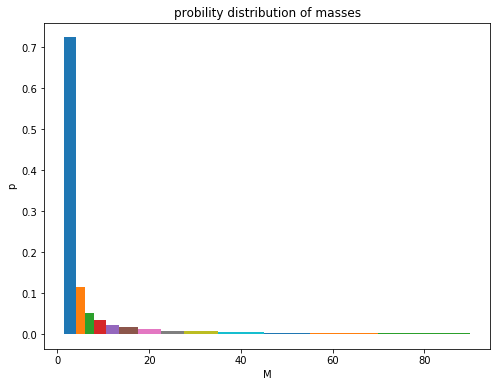

In [8]:
#print mass_dist.values()
for b,a, m  in zip(bins, b2, mass_list): 
    p=CDF_imf(b, a, 2.3, 2.21306)
    print b,a,p
    x=[b,a,a,b]
    y=[0,0, p,p]
    
    plt.fill(x,y)
    
plt.title ("probility distribution of masses")
plt.ylabel("p")
plt.xlabel("M")
plt.show()

# rotation distribution #

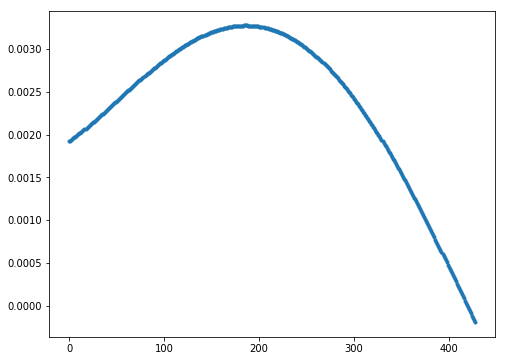

In [9]:
# load in  rot distributoon
v_dist=pd.read_pickle('./v_dist.pk')
plt.plot(v_dist[v_dist.columns[1]], v_dist[v_dist.columns[0]], '.')

# define rotation bins # 

In [10]:
#rot_bins={}

#for m in mass_list: 
#    f_list=[]
#    for f in data_files:
#        if ('f' +str(m)+'-') in f:
#            #print f,
#            f_list.append(f)#

#    for i in range(0, len(f_list)):
#        f=f_list[i]
#        m=m_val(f)
#        v=v_val(f)
#        if (i < len(f_list)-1) and i > 0:
#            fp1=f_list[i+1]
#            fm1=f_list[i-1]
#            u_bin= float((v_val(fp1) - v_val(f))  ) *0.5 +  v_val(f)
#            l_bin= float((v_val(fm1) - v_val(f))  ) *0.5 +  v_val(f)3

#        if i ==0 : # for 1st file
#            fp1=f_list[i+1]
#            u_bin= float((v_val(fp1) - v_val(f))  ) *0.5 +  v_val(f)
#            l_bin= 0

#        if (i ==len(f_list)-1) : # for last file
#            fm1=f_list[i-1]
#            u_bin= v_val(f)
#            l_bin= float((v_val(fm1) - v_val(f))  ) *0.5 +  v_val(f)

#        rot_bins[m,v] = [l_bin, u_bin]


#for k in sorted(rot_bins.keys()):
    #print k, rot_bins[k]

In [8]:
t_val= 1 # in s

rot_df= pd.DataFrame(columns=['M', 'V', 'V_act', 'V_crit'])
for f in data_files: 
    df,_=read_dat2file(f)
    
    df_MS= FIND MS MODELS. MAYBE LOOK AT SURFACE HE OR H, OR MASS LOSS RATE?
    
    # add models with time nearest to time value to new dataframe
    # check that nearest model is still MS
    T=df['1:[s]'].loc[(df['1:t[s]']-t_val).abs().argmin()]
    if t_val
    v_act= df['9:v_surf[km/s]'].loc[(df['1:t[s]']-t_val).abs().argmin()]
    v_crit=  df['8:v_crit[km/s]'].loc[(df['1:t[s]']-t_val).abs().argmin()]
    d=pd.DataFrame([[m_val(f), v_val(f), v_act, v_crit]], columns=['M', 'V', 'V_act', 'V_crit'])
    rot_df=rot_df.append(d)
    
rot_df.head()

SyntaxError: invalid syntax (<ipython-input-8-f2dbf42adcb6>, line 12)

In [12]:
mass_groups= rot_df.groupby('M')
r_final=pd.DataFrame()
for mass,mass_group in mass_groups:
    
    ###########################
    # calculate velocity bins #
    ###########################
    u_bin= (mass_group['V_act'].diff().shift(-1)*0.5 + mass_group['V_act']).abs()
    l_bin= (mass_group['V_act'].diff()*0.5 - mass_group['V_act']).abs()
    mass_group['lower_bin']= l_bin
    mass_group['upper_bin']= u_bin
    
    # set lower bin value for non rotator to 0 
    mass_group.at[0,'lower_bin'] [0] =0 
    #set upper bin value for fastest rotator to fastest rotation value 
    mass_group.at[0,'upper_bin'] [-1]= mass_group['V_act'].max()
    
    
    
    ################################################
    # integrate v pdf between lower and upper bins #
    ################################################
    for i in range(0 ,len(mass_group)):
       
        b=mass_group.iloc[i].lower_bin
        a=mass_group.iloc[i].upper_bin
        x=v_dist.loc[ (v_dist['v'] < a) & (v_dist['v'] >b), 'v' ]
        y=v_dist.loc[ (v_dist['v'] < a) & (v_dist['v'] >b), 'pdf' ]


        if len(x) != 0 and len(y) != 0:
            mass_group.at[0,'v_cdf_int_value'] [i] = (integrate.cumtrapz(x=x, y=y, initial=0 )).max()

        else :
            mass_group.at[0,'v_cdf_int_value'] [i] =0

        ######################################
        # combine mass and rot distributions #
        ######################################
        
        #fraction of stars in mass group with particular rotation
        f_r=mass_group.iloc[i].v_cdf_int_value
        #fraction of stars with mass of mass group 
        f_m=mass_dist[int(mass)]
           
        mass_group.at[0,'frac'] [i] = f_r * f_m
    
    # check that for each mass, the sum of the integrals is unity 
    print "sum of v_cdf int vals for ", mass,"M_sun: ", np.sum(mass_group['v_cdf_int_value'])
    
    
    r_final=r_final.append(mass_group)
    
print r_final.head()

Empty DataFrame
Columns: []
Index: []


# count number of stars above with v/vcrit above some value #

In [11]:

df=pd.read_pickle('./syn_pop.pk')
print df.head()
Be_value=0.7
print 'At time (s)', t_val ,'proportion of that are Be : '
print df[(df['V_act']/ df['V_crit']) > Be_value].sum().frac

print df.sum().frac
    

     M      V       V_act   V_crit   lower_bin   upper_bin v_cdf_int_value  \
0  3.0    0.0    0.000000    0.000    0.000000   29.765587       0.0572685   
0  3.0   50.0   59.531175  560.232   29.765587   89.440113        0.146707   
0  3.0  100.0  119.349051  557.570   89.440113  149.268344        0.177626   
0  3.0  150.0  179.187637  553.749  149.268344  209.243091        0.191954   
0  3.0  200.0  239.298546  546.230  209.243091  269.978786        0.181007   

        frac  
0  0.0414702  
0   0.106236  
0   0.128625  
0   0.139001  
0   0.131074  
At time (s) 0 proportion of that are Be : 
0.00626745195787
0.9112232287


# calculate discretized distribution of rotations # 

In [205]:
# checl integral over whole v pdf is unity 
print (integrate.cumtrapz(x=v_dist['v'], y=v_dist['pdf'], initial=0 )).max()

1.00552393794


In [206]:
mass_groups= r_final.groupby('M')
r_final=pd.DataFrame()
for mass,mass_group in mass_groups:
    mass_group['v_cdf_int_value']= ''
    for i in range(0 ,len(mass_group)):
        #perform integration of pdf between lower and upper bins 
        b=mass_group.iloc[i].lower_bin
        a=mass_group.iloc[i].upper_bin
        x=v_dist.loc[ (v_dist['v'] < a) & (v_dist['v'] >b), 'v' ]
        y=v_dist.loc[ (v_dist['v'] < a) & (v_dist['v'] >b), 'pdf' ]
        
        if len(x) != 0 and len(y) != 0:
            #print (integrate.cumtrapz(x=x, y=y, initial=0 )).max()
            mass_group.at[0,'v_cdf_int_value'] [i] = (integrate.cumtrapz(x=x, y=y, initial=0 )).max()
            
        else :
            mass_group.at[0,'v_cdf_int_value'] [i] =0
    r_final=r_final.append(mass_group)
    
    
    # check that for each mass, the sum of the integrals is unity 
    print "sum of v_cdf int vals for ", mass,"M_sun: ", np.sum(mass_group['v_cdf_int_value'])
    

sum of v_cdf int vals for  3.0 M_sun:  0.985492045527
sum of v_cdf int vals for  5.0 M_sun:  0.984685129758
sum of v_cdf int vals for  7.0 M_sun:  0.984309576232
sum of v_cdf int vals for  9.0 M_sun:  0.984069986923
sum of v_cdf int vals for  10.0 M_sun:  0.983990854799
sum of v_cdf int vals for  12.0 M_sun:  0.983808486527
sum of v_cdf int vals for  15.0 M_sun:  0.983594804863
sum of v_cdf int vals for  20.0 M_sun:  0.983333913813
sum of v_cdf int vals for  25.0 M_sun:  0.98318800682
sum of v_cdf int vals for  30.0 M_sun:  0.983056013991
sum of v_cdf int vals for  35.0 M_sun:  0.979965387103
sum of v_cdf int vals for  40.0 M_sun:  0.982833527892
sum of v_cdf int vals for  50.0 M_sun:  0.982649870238
sum of v_cdf int vals for  60.0 M_sun:  0.982460314271
sum of v_cdf int vals for  80.0 M_sun:  0.982266739086
sum of v_cdf int vals for  100.0 M_sun:  0.98206203663


In [207]:
print r_final.head(20)

   M    V       V_act   V_crit   lower_bin   upper_bin v_cdf_int_value
0  3    0    0.000000    0.000    0.000000   29.765587       0.0572685
0  3   50   59.531175  560.232   29.765587   89.440113        0.146707
0  3  100  119.349051  557.570   89.440113  149.268344        0.177626
0  3  150  179.187637  553.749  149.268344  209.243091        0.191954
0  3  200  239.298546  546.230  209.243091  269.978786        0.181007
0  3  250  300.659027  537.192  269.978786  331.970185        0.146243
0  3  300  363.281343  523.048  331.970185  392.441509       0.0760343
0  3  350  421.601676  512.064  392.441509  434.114345      0.00865316
0  3  400  446.627014  493.145  434.114345  468.656269               0
0  3  420  490.685524  493.356  468.656269  493.910128               0
0  3  450  497.134732  491.710  493.910128  499.096715               0
0  3  500  501.058697  488.121  499.096715  501.058697               0
0  5    0    0.000000    0.000    0.000000   29.099514       0.0572685
0  5  

# combine mass and rotation distributions to get proportion of stars of each mass and rotation # 

In [13]:
mass_groups= r_final.groupby('M')
r_final=pd.DataFrame()
for mass,mass_group in mass_groups:
    mass_group['frac']= ''
    for i in range(0 ,len(mass_group)):
        #fraction of stars in mass group with particular rotation
        f_r=mass_group.iloc[i].v_cdf_int_value
        #fraction of stars with mass of mass group 
        f_m=mass_dist[int(mass)]
           
        mass_group.at[0,'frac'] [i] = f_r * f_m
    r_final=r_final.append(mass_group)
    
    

print r_final.head(20)


print r_final['frac'].sum()

KeyError: 'M'

# export dataframe to be analysed # 

In [214]:
r_final.to_pickle('./syn_pop.pk')

# visualize whole distribution # 

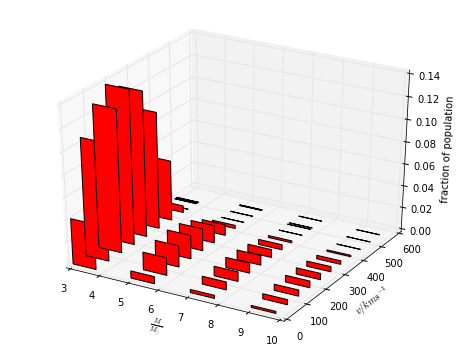

In [202]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


for index, row in r_final.iterrows():
    m=  [row.M]
    v=  [row.V_act]
    z=[row.frac]
    ax.bar(left=m, height=z, zs=v, zdir='y', color='r', alpha=1)


ax.set_xlabel(r'$\frac{M}{M_{\odot}}$')
ax.set_ylabel(r'$v/kms^{-1}$')
ax.set_zlabel('fraction of population')

plt.show()

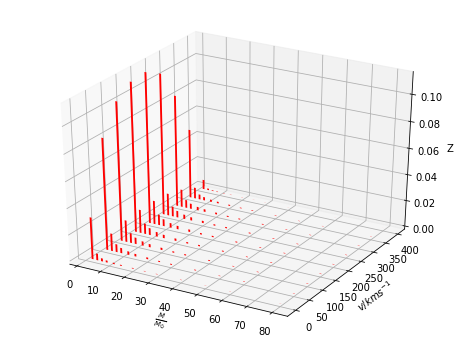

In [224]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for mass_key in mass_list:
    for key in tot_dist.keys():
        if key[0] == mass_key: 
            m=  [mass_key]
            v=  [key[1]]
            z=tot_dist[mass_key, key[1]]
            ax.bar(left=m, height=z, zs=v, zdir='y', color='r', alpha=1)


ax.set_xlabel(r'$\frac{M}{M_{\odot}}$')
ax.set_ylabel(r'$v/kms^{-1}$')
ax.set_zlabel('fraction of population')

plt.show()

# TESTING#

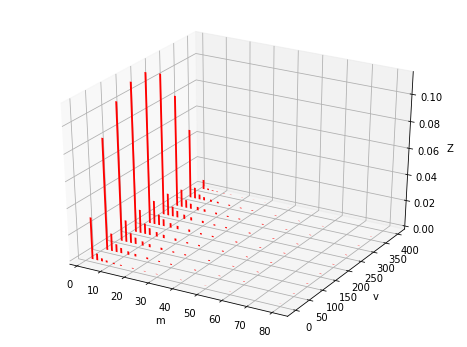

Traceback (most recent call last):
  File "/home/ben/.local/lib/python2.7/site-packages/matplotlib/backends/backend_qt5agg.py", line 197, in __draw_idle_agg
    FigureCanvasAgg.draw(self)
  File "/home/ben/.local/lib/python2.7/site-packages/matplotlib/backends/backend_agg.py", line 464, in draw
    self.figure.draw(self.renderer)
  File "/home/ben/.local/lib/python2.7/site-packages/matplotlib/artist.py", line 63, in draw_wrapper
    draw(artist, renderer, *args, **kwargs)
  File "/home/ben/.local/lib/python2.7/site-packages/matplotlib/figure.py", line 1143, in draw
    renderer, self, dsu, self.suppressComposite)
  File "/home/ben/.local/lib/python2.7/site-packages/matplotlib/image.py", line 139, in _draw_list_compositing_images
    a.draw(renderer)
  File "/home/ben/.local/lib/python2.7/site-packages/mpl_toolkits/mplot3d/axes3d.py", line 278, in draw
    for patch in self.patches]
AttributeError: 'Rectangle' object has no attribute 'do_3d_projection'


In [217]:

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for mass_key in mass_list:
    for key in tot_dist.keys():
        if key[0] == mass_key: 
            m=  [mass_key]
            v=  [key[1]]
            z=tot_dist[mass_key, key[1]]



            ax.bar(left=m, height=z, zs=v, zdir='y', color='r', alpha=1)




ax.set_xlabel('m')
ax.set_ylabel('v')
ax.set_zlabel('Z')

plt.show()

/users/bhastings/internship/data/MW/f3-0.mw.dat2


,1:t[s],2:M/Msun,3:Teff[K],4:log(L/Lsun),5:R/Rsun,6:log(Mdot)[Msun/yr],11:H,12:He,26:H_massfr,27:He_massfr,8:v_crit[km/s],9:v_surf[km/s]
0,0,2.999951,12924.05582,1.913480,1.80524,-11.4345,12,10.957542,0.727394,0.263815,0,0
1,2173170,2.999943,12909.82766,1.914818,1.81202,-11.4320,12,10.957542,0.727394,0.263815,0,0
2,4303070,2.999935,12893.76372,1.916307,1.81965,-11.4291,12,10.957542,0.727394,0.263815,0,0
3,6397260,2.999928,12877.70551,1.917818,1.82737,-11.4257,12,10.957542,0.727394,0.263815,0,0
4,8460320,2.999920,12862.18477,1.919337,1.83499,-11.4224,12,10.957542,0.727394,0.263815,0,0


In [159]:
print len(rot_values)

13


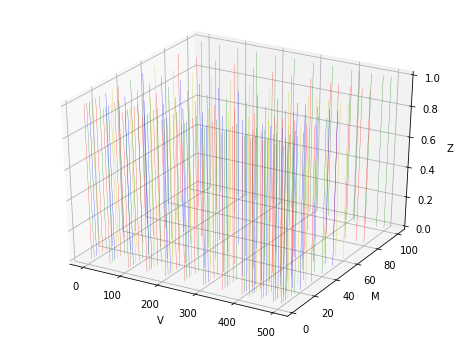

In [162]:

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for  z in ( mass_list):
    
    u=[]
    for key in tot_dist.keys():
        if key[0] == z: 
            #print tot_dist[mass_key, key[1]]
            u.append(tot_dist[mass_key, key[1]])
    
    
    
    xs = rot_values
    ys = np.ones(len(rot_values))

   
    ax.bar(xs, ys, zs=z, zdir='y', alpha=0.8)

ax.set_xlabel('V')
ax.set_ylabel('M')
ax.set_zlabel('Z')

plt.show()